In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取兩個 Excel 檔案並合併
df1 = pd.read_excel('/Users/ccit0915/Desktop/交通部航管局AI智慧專案/進港船舶.xlsx')
df2 = pd.read_excel('/Users/ccit0915/Desktop/交通部航管局AI智慧專案/出港船舶.xlsx')
df = pd.concat([df1, df2], ignore_index=True)

# 正確判斷進出港
df["進出"] = df.apply(lambda row: "進港" if pd.isna(row["目的港"]) else ("出港" if pd.isna(row["來源港"]) else "未知"), axis=1)

# 篩選台中港資料
df_tc = df[df["臺灣港"] == "臺中港(TWTXG)"].copy()

# 補齊艘次欄位缺值
df_tc["艘次"] = pd.to_numeric(df_tc["艘次"], errors="coerce").fillna(1).astype(int)

# 確保年月是文字格式
df_tc["年月"] = df_tc["年月"].astype(str)
df_tc

,目的洲,目的港,來源洲,來源港,航線,艘次,船舶種類,臺灣港,年月,進出
224,NaN,NaN,大洋洲,開普福類特瑞港(AUCQP),Z901兩岸直航航線,2,雜貨船,臺中港(TWTXG),2020/05,進港
225,NaN,NaN,大洋洲,紐卡斯爾港(AUNTL),NaN,7,散裝船,臺中港(TWTXG),2020/05,進港
226,NaN,NaN,南美洲,科羅內爾(CLCNL),NaN,2,雜貨船,臺中港(TWTXG),2020/05,進港
227,NaN,NaN,亞洲,北海港(CNBHY),Z901兩岸直航航線,1,雜貨船,臺中港(TWTXG),2020/05,進港
228,NaN,NaN,亞洲,防城港(CNFAN),Z901兩岸直航航線,1,散裝船,臺中港(TWTXG),2020/05,進港
...,...,...,...,...,...,...,...,...,...,...
143200,亞洲,臺北港(TWTPE),NaN,NaN,NaN,1,工作船,臺中港(TWTXG),2025/04,出港
143201,亞洲,TWTXGOS,NaN,NaN,NaN,5,挖泥船,臺中港(TWTXG),2025/04,出港
143202,亞洲,TWTXGOS,NaN,NaN,NaN,2,受泥船,臺中港(TWTXG),2025/04,出港
143203,亞洲,TWTXGOS,NaN,NaN,NaN,3,電纜敷設船,臺中港(TWTXG),2025/04,出港


/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_94936/1202969009.py:12: UserWarning: Glyph 36914 (\N{CJK UNIFIED IDEOGRAPH-9032}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_94936/1202969009.py:12: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36914 (\N{CJK UNIFIED IDEOGRAPH-9032}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ccit0915/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20986 (\N{CJK UNIFIED IDEOGRAPH-51FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


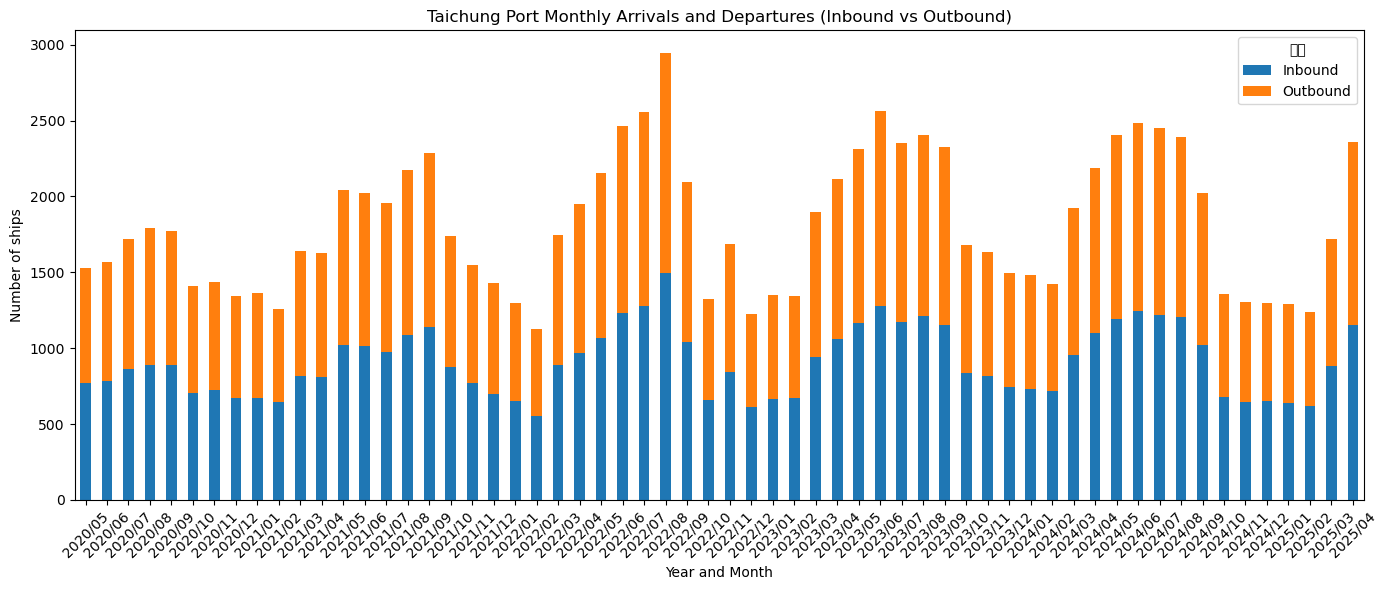

In [24]:
# 將進出港中文標籤轉換成英文
df_tc["進出"] = df_tc["進出"].replace({"進港": "Inbound", "出港": "Outbound", "未知": "Unknown"})
monthly_counts = df_tc.groupby(["年月", "進出"])["艘次"].sum().reset_index()
pivot_counts = monthly_counts.pivot(index="年月", columns="進出", values="艘次").fillna(0)
pivot_counts = pivot_counts.sort_index()

pivot_counts.plot(kind="bar", stacked=True, figsize=(14, 6))
plt.title("Taichung Port Monthly Arrivals and Departures (Inbound vs Outbound)")
plt.ylabel("Number of ships")
plt.xlabel("Year and Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
import numpy as np

# 替換可能的 "NaN" 字串與空白
df_tc.replace(["NaN", ""], np.nan, inplace=True)

# 複製 DataFrame
df_cleaned = df_tc.copy()

# 補全「Inbound」的目的洲與目的港
df_cleaned.loc[(df_cleaned["進出"] == "Inbound") & (df_cleaned["目的洲"].isna()), "目的洲"] = "亞洲"
df_cleaned.loc[(df_cleaned["進出"] == "Inbound") & (df_cleaned["目的港"].isna()), "目的港"] = "臺中港(TWTXG)"

# 補全「Outbound」的來源洲與來源港
df_cleaned.loc[(df_cleaned["進出"] == "Outbound") & (df_cleaned["來源洲"].isna()), "來源洲"] = "亞洲"
df_cleaned.loc[(df_cleaned["進出"] == "Outbound") & (df_cleaned["來源港"].isna()), "來源港"] = "臺中港(TWTXG)"

# 驗證補值是否成功
print(df_cleaned[["目的洲", "目的港", "來源洲", "來源港"]].isna().sum())

目的洲    2
目的港    0
來源洲    1
來源港    0
dtype: int64


In [44]:
# 刪除目的洲或來源洲為 NaN 的資料
df_cleaned = df_cleaned[~(df_cleaned["目的洲"].isna() | df_cleaned["來源洲"].isna())]

In [46]:
print(df_cleaned[["目的洲", "目的港", "來源洲", "來源港"]].isna().sum())

目的洲    0
目的港    0
來源洲    0
來源港    0
dtype: int64


In [48]:
df_cleaned

,目的洲,目的港,來源洲,來源港,航線,艘次,船舶種類,臺灣港,年月,進出
224,亞洲,臺中港(TWTXG),大洋洲,開普福類特瑞港(AUCQP),Z901兩岸直航航線,2,雜貨船,臺中港(TWTXG),2020/05,Inbound
225,亞洲,臺中港(TWTXG),大洋洲,紐卡斯爾港(AUNTL),NaN,7,散裝船,臺中港(TWTXG),2020/05,Inbound
226,亞洲,臺中港(TWTXG),南美洲,科羅內爾(CLCNL),NaN,2,雜貨船,臺中港(TWTXG),2020/05,Inbound
227,亞洲,臺中港(TWTXG),亞洲,北海港(CNBHY),Z901兩岸直航航線,1,雜貨船,臺中港(TWTXG),2020/05,Inbound
228,亞洲,臺中港(TWTXG),亞洲,防城港(CNFAN),Z901兩岸直航航線,1,散裝船,臺中港(TWTXG),2020/05,Inbound
...,...,...,...,...,...,...,...,...,...,...
143200,亞洲,臺北港(TWTPE),亞洲,臺中港(TWTXG),NaN,1,工作船,臺中港(TWTXG),2025/04,Outbound
143201,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),NaN,5,挖泥船,臺中港(TWTXG),2025/04,Outbound
143202,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),NaN,2,受泥船,臺中港(TWTXG),2025/04,Outbound
143203,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),NaN,3,電纜敷設船,臺中港(TWTXG),2025/04,Outbound


In [52]:
# 用 '未知' 填補船舶種類的缺失值
df_cleaned['船舶種類'] = df_cleaned['船舶種類'].fillna('未知')

# 刪除航線欄位
df_cleaned = df_cleaned.drop(columns=['航線'])

# 確認結果
print(df_cleaned[['船舶種類']].isna().sum())  # 應該是0
print('航線' in df_cleaned.columns)  # 應該是 False

船舶種類    0
dtype: int64
False


In [62]:
output_path = "/Users/ccit0915/Desktop/交通部航管局AI智慧專案/cleaned_taichung_port_data.xlsx"
df_cleaned.to_excel(output_path, index=False)
print(f"清理完畢的資料已儲存至：{output_path}")

清理完畢的資料已儲存至：/Users/ccit0915/Desktop/交通部航管局AI智慧專案/cleaned_taichung_port_data.xlsx


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/ccit0915/Desktop/交通部航管局AI智慧專案/進出港船舶合併.xlsx')
df

,目的洲,目的港,來源洲,來源港,艘次,船舶種類,臺灣港,年月,進出
0,亞洲,臺中港(TWTXG),大洋洲,開普福類特瑞港(AUCQP),2,雜貨船,臺中港(TWTXG),2020/05,Inbound
1,亞洲,臺中港(TWTXG),大洋洲,紐卡斯爾港(AUNTL),7,散裝船,臺中港(TWTXG),2020/05,Inbound
2,亞洲,臺中港(TWTXG),南美洲,科羅內爾(CLCNL),2,雜貨船,臺中港(TWTXG),2020/05,Inbound
3,亞洲,臺中港(TWTXG),亞洲,北海港(CNBHY),1,雜貨船,臺中港(TWTXG),2020/05,Inbound
4,亞洲,臺中港(TWTXG),亞洲,防城港(CNFAN),1,散裝船,臺中港(TWTXG),2020/05,Inbound
...,...,...,...,...,...,...,...,...,...
30638,亞洲,臺北港(TWTPE),亞洲,臺中港(TWTXG),1,工作船,臺中港(TWTXG),2025/04,Outbound
30639,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),5,挖泥船,臺中港(TWTXG),2025/04,Outbound
30640,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),2,受泥船,臺中港(TWTXG),2025/04,Outbound
30641,亞洲,TWTXGOS,亞洲,臺中港(TWTXG),3,電纜敷設船,臺中港(TWTXG),2025/04,Outbound


In [110]:
import pandas as pd

# 移除「臺灣港」欄位（皆為台中港，無區辨力）
df.drop(columns=['臺灣港'], inplace=True)

# 將進港資料的目的港、目的洲，出港資料的來源港、來源洲設為 NaN（結構性缺失）
df.loc[df['進出'] == 'Inbound', ['目的港', '目的洲']] = pd.NA
df.loc[df['進出'] == 'Outbound', ['來源港', '來源洲']] = pd.NA

# 頻率編碼函數（保留 NaN）
def frequency_encode(series):
    freq = series.value_counts(normalize=True)
    return series.map(freq)

# 對四個欄位進行頻率編碼
for col in ['目的洲', '目的港', '來源洲', '來源港']:
    df[f'{col}_freq'] = frequency_encode(df[col])
df

,目的洲,目的港,來源洲,來源港,艘次,船舶種類,年月,進出,目的洲_freq,目的港_freq,來源洲_freq,來源港_freq
0,<NA>,<NA>,大洋洲,開普福類特瑞港(AUCQP),2,雜貨船,2020/05,Inbound,NaN,NaN,0.038006,0.006182
1,<NA>,<NA>,大洋洲,紐卡斯爾港(AUNTL),7,散裝船,2020/05,Inbound,NaN,NaN,0.038006,0.005792
2,<NA>,<NA>,南美洲,科羅內爾(CLCNL),2,雜貨船,2020/05,Inbound,NaN,NaN,0.006248,0.001302
3,<NA>,<NA>,亞洲,北海港(CNBHY),1,雜貨船,2020/05,Inbound,NaN,NaN,0.925029,0.002408
4,<NA>,<NA>,亞洲,防城港(CNFAN),1,散裝船,2020/05,Inbound,NaN,NaN,0.925029,0.002473
...,...,...,...,...,...,...,...,...,...,...,...,...
30638,亞洲,臺北港(TWTPE),<NA>,<NA>,1,工作船,2025/04,Outbound,0.948092,0.035151,NaN,NaN
30639,亞洲,TWTXGOS,<NA>,<NA>,5,挖泥船,2025/04,Outbound,0.948092,0.033056,NaN,NaN
30640,亞洲,TWTXGOS,<NA>,<NA>,2,受泥船,2025/04,Outbound,0.948092,0.033056,NaN,NaN
30641,亞洲,TWTXGOS,<NA>,<NA>,3,電纜敷設船,2025/04,Outbound,0.948092,0.033056,NaN,NaN


In [112]:
# 將年月欄位轉為 datetime 格式，再分離出年與月
df['年月'] = pd.to_datetime(df['年月'], format='%Y/%m')
df['年'] = df['年月'].dt.year
df['月'] = df['年月'].dt.month
df

,目的洲,目的港,來源洲,來源港,艘次,船舶種類,年月,進出,目的洲_freq,目的港_freq,來源洲_freq,來源港_freq,年,月
0,<NA>,<NA>,大洋洲,開普福類特瑞港(AUCQP),2,雜貨船,2020-05-01,Inbound,NaN,NaN,0.038006,0.006182,2020,5
1,<NA>,<NA>,大洋洲,紐卡斯爾港(AUNTL),7,散裝船,2020-05-01,Inbound,NaN,NaN,0.038006,0.005792,2020,5
2,<NA>,<NA>,南美洲,科羅內爾(CLCNL),2,雜貨船,2020-05-01,Inbound,NaN,NaN,0.006248,0.001302,2020,5
3,<NA>,<NA>,亞洲,北海港(CNBHY),1,雜貨船,2020-05-01,Inbound,NaN,NaN,0.925029,0.002408,2020,5
4,<NA>,<NA>,亞洲,防城港(CNFAN),1,散裝船,2020-05-01,Inbound,NaN,NaN,0.925029,0.002473,2020,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30638,亞洲,臺北港(TWTPE),<NA>,<NA>,1,工作船,2025-04-01,Outbound,0.948092,0.035151,NaN,NaN,2025,4
30639,亞洲,TWTXGOS,<NA>,<NA>,5,挖泥船,2025-04-01,Outbound,0.948092,0.033056,NaN,NaN,2025,4
30640,亞洲,TWTXGOS,<NA>,<NA>,2,受泥船,2025-04-01,Outbound,0.948092,0.033056,NaN,NaN,2025,4
30641,亞洲,TWTXGOS,<NA>,<NA>,3,電纜敷設船,2025-04-01,Outbound,0.948092,0.033056,NaN,NaN,2025,4


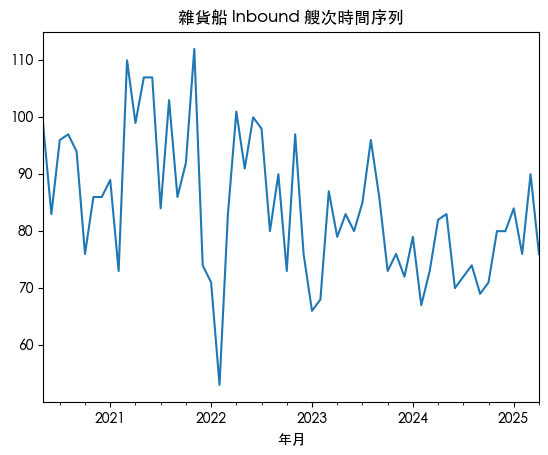

In [118]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

font_path = '/System/Library/Fonts/STHeiti Medium.ttc'  # macOS中文字型
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

example_ts.plot(title='雜貨船 Inbound 艘次時間序列')
plt.show()

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/Users/ccit0915/Desktop/交通部航管局AI智慧專案/最新主表.xlsx')
df

,year,month,港口,period,LNG,LPG,佈管線船,全貨櫃船,冷凍船,化學液體船,...,起重船,車輛渡船,載重平台船,錨船,雜貨船,電纜修理船,電纜敷設船,駁船,駛上駛下船,方向
0,2020,5,AUZZZ,2020-05-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
1,2020,5,BNZ99,2020-05-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
2,2020,5,CAZ99,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
3,2020,5,CNCGU,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,進港
4,2020,5,CNNBO,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,2025,4,馬六甲港(MYMKZ),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,出港
15887,2025,4,馬山港(KRMAS),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,出港
15888,2025,4,高欄港(CNZUH),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,出港
15889,2025,4,高雄港(TWKHH),2025-04-01,0,1,0,124,0,2,...,1,0,0,0,4,0,0,0,0,出港


In [124]:
import pandas as pd

# 轉換 period 欄為 datetime
df['period'] = pd.to_datetime(df['period'])

# 只保留年月，統一日期到每月第一天
df['period'] = df['period'].dt.to_period('M').dt.to_timestamp()

# 檢查結果
print(df[['period']].head())

      period
0 2020-05-01
1 2020-05-01
2 2020-05-01
3 2020-05-01
4 2020-05-01


In [126]:
df

,year,month,港口,period,LNG,LPG,佈管線船,全貨櫃船,冷凍船,化學液體船,...,起重船,車輛渡船,載重平台船,錨船,雜貨船,電纜修理船,電纜敷設船,駁船,駛上駛下船,方向
0,2020,5,AUZZZ,2020-05-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
1,2020,5,BNZ99,2020-05-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
2,2020,5,CAZ99,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
3,2020,5,CNCGU,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,進港
4,2020,5,CNNBO,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,進港
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,2025,4,馬六甲港(MYMKZ),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,出港
15887,2025,4,馬山港(KRMAS),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,出港
15888,2025,4,高欄港(CNZUH),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,出港
15889,2025,4,高雄港(TWKHH),2025-04-01,0,1,0,124,0,2,...,1,0,0,0,4,0,0,0,0,出港


In [128]:
import pandas as pd


# 依方向分組計算港口頻率字典
freq_in = df[df['方向'] == '進港']['港口'].value_counts(normalize=True).to_dict()
freq_out = df[df['方向'] == '出港']['港口'].value_counts(normalize=True).to_dict()

# 定義編碼函數
def freq_encode(row):
    if row['方向'] == '進港':
        return freq_in.get(row['港口'], 0)
    else:
        return freq_out.get(row['港口'], 0)

# 新增頻率編碼欄位
df['港口頻率編碼'] = df.apply(freq_encode, axis=1)

# 逆轉換字典（頻率編碼 -> 港口名稱）
# 頻率會有重複，但通常港口名稱是唯一的，所以用反轉字典存儲「頻率對應港口」
# 這邊用list存可能多個港口對應同頻率，防止資料遺失
from collections import defaultdict

inv_freq_in = defaultdict(list)
for k, v in freq_in.items():
    inv_freq_in[v].append(k)

inv_freq_out = defaultdict(list)
for k, v in freq_out.items():
    inv_freq_out[v].append(k)

In [130]:
df

,year,month,港口,period,LNG,LPG,佈管線船,全貨櫃船,冷凍船,化學液體船,...,車輛渡船,載重平台船,錨船,雜貨船,電纜修理船,電纜敷設船,駁船,駛上駛下船,方向,港口頻率編碼
0,2020,5,AUZZZ,2020-05-01,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,進港,0.000979
1,2020,5,BNZ99,2020-05-01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,進港,0.000122
2,2020,5,CAZ99,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,進港,0.001958
3,2020,5,CNCGU,2020-05-01,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,進港,0.003060
4,2020,5,CNNBO,2020-05-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,進港,0.006486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15886,2025,4,馬六甲港(MYMKZ),2025-04-01,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,出港,0.005440
15887,2025,4,馬山港(KRMAS),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,出港,0.003627
15888,2025,4,高欄港(CNZUH),2025-04-01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,出港,0.003886
15889,2025,4,高雄港(TWKHH),2025-04-01,0,1,0,124,0,2,...,0,0,0,4,0,0,0,0,出港,0.007772


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


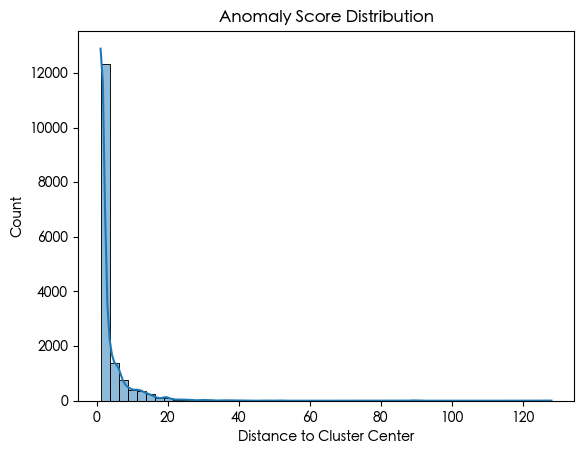

In [156]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 提取艘次資料（船舶類別為 target_cols）
X = df[target_cols].copy()

# 2. 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. KMeans 聚類
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

# 4. 計算距離到所屬中心點
distances = kmeans.transform(X_scaled)
closest_distances = distances[np.arange(len(X_scaled)), kmeans.labels_]

# 5. 將距離加入原始資料
df["anomaly_score"] = closest_distances

# 6. 畫圖看看
sns.histplot(df["anomaly_score"], bins=50, kde=True)
plt.title("Anomaly Score Distribution")
plt.xlabel("Distance to Cluster Center")
plt.show()

# 7. 找出異常樣本（例如距離最大前 2%）
threshold = df["anomaly_score"].quantile(0.98)
anomalies = df[df["anomaly_score"] > threshold]

In [158]:
anomalies.sort_values("anomaly_score", ascending=False).head(10)

,year,month,港口,period,LNG,LPG,佈管線船,全貨櫃船,冷凍船,化學液體船,...,電纜敷設船,駁船,駛上駛下船,方向,港口頻率編碼,方向編碼,period_年,period_月,period_日,anomaly_score
871,2020,11,TWKNH,2020-11-01,0,0,0,0,0,0,...,0,0,0,進港,0.007343,1,2020,11,1,128.159765
1769,2021,5,基隆港(TWKEL),2021-05-01,0,0,0,96,0,0,...,1,0,0,進港,0.007343,1,2021,5,1,126.893595
12881,2023,5,TWMAL,2023-05-01,0,0,0,0,0,3,...,0,0,0,出港,0.007772,0,2023,5,1,126.482987
4817,2023,3,蘇澳港(TWSUO),2023-03-01,0,0,0,0,0,2,...,0,0,0,進港,0.007343,1,2023,3,1,126.296051
6038,2024,1,JPUJI,2024-01-01,0,0,0,0,0,0,...,0,0,0,進港,0.000122,1,2024,1,1,126.060808
7107,2024,8,高雄港(TWKHH),2024-08-01,0,0,0,74,0,0,...,0,0,0,進港,0.007343,1,2024,8,1,125.558873
183,2020,6,TWOWP2,2020-06-01,0,0,0,0,0,0,...,0,0,0,進港,0.007098,1,2020,6,1,91.281211
15425,2025,1,TWTXGOS,2025-01-01,0,0,0,1,0,1,...,1,0,0,出港,0.007772,0,2025,1,1,91.213385
9903,2021,5,臺中港(TWTXG),2021-05-01,0,0,0,0,0,0,...,0,0,0,出港,0.006995,0,2021,5,1,89.642073
6939,2024,7,海防港(VNHPH),2024-07-01,0,1,0,0,0,0,...,0,0,0,進港,0.005263,1,2024,7,1,89.315314


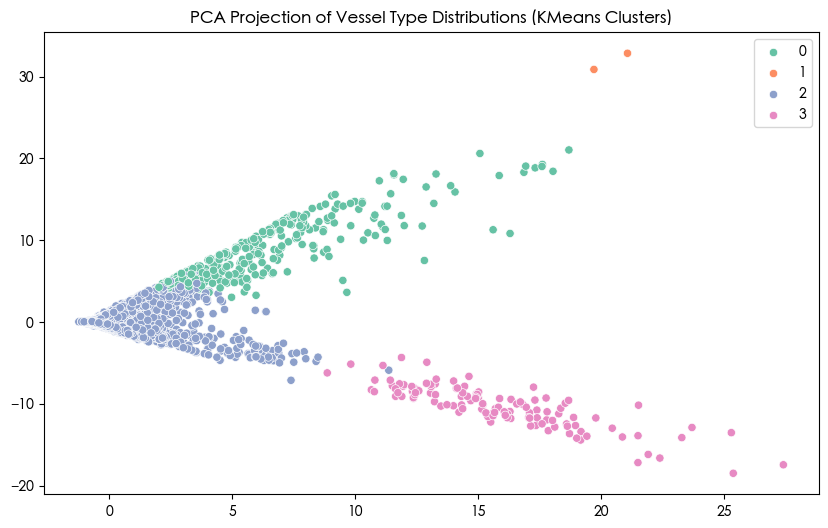

In [160]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette="Set2")
plt.title("PCA Projection of Vessel Type Distributions (KMeans Clusters)")
plt.show()

In [162]:
for q in [0.95, 0.98, 0.99, 0.995]:
    print(f"Top {100 - q*100:.1f}% threshold: {df['anomaly_score'].quantile(q):.3f}")

Top 5.0% threshold: 12.561
Top 2.0% threshold: 18.811
Top 1.0% threshold: 24.013
Top 0.5% threshold: 31.285


       year  month          港口     period  LNG  LPG  佈管線船  全貨櫃船  冷凍船  化學液體船  \
871    2020     11       TWKNH 2020-11-01    0    0     0     0    0      0   
1769   2021      5  基隆港(TWKEL) 2021-05-01    0    0     0    96    0      0   
12881  2023      5       TWMAL 2023-05-01    0    0     0     0    0      3   
4817   2023      3  蘇澳港(TWSUO) 2023-03-01    0    0     0     0    0      2   
6038   2024      1       JPUJI 2024-01-01    0    0     0     0    0      0   

       ...  電纜敷設船  駁船  駛上駛下船  方向    港口頻率編碼  方向編碼  period_年  period_月  \
871    ...      0   0      0  進港  0.007343     1      2020        11   
1769   ...      1   0      0  進港  0.007343     1      2021         5   
12881  ...      0   0      0  出港  0.007772     0      2023         5   
4817   ...      0   0      0  進港  0.007343     1      2023         3   
6038   ...      0   0      0  進港  0.000122     1      2024         1   

       period_日  anomaly_score  
871           1     128.159765  
1769          1     126.89

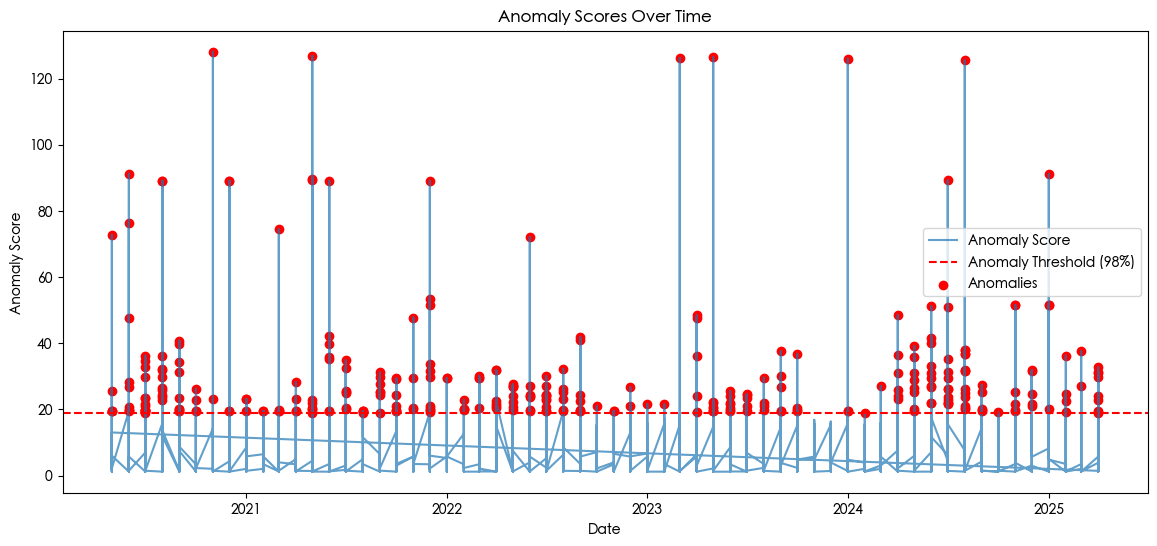

In [164]:
import matplotlib.dates as mdates

# 設門檻
threshold = df["anomaly_score"].quantile(0.98)
anomalies = df[df["anomaly_score"] > threshold]

# 看異常樣本前5筆
print(anomalies.sort_values("anomaly_score", ascending=False).head())

# 畫時間序列圖
df['period'] = pd.to_datetime(df['period'])

plt.figure(figsize=(14,6))
plt.plot(df['period'], df['anomaly_score'], label='Anomaly Score', alpha=0.7)
plt.axhline(threshold, color='red', linestyle='--', label='Anomaly Threshold (98%)')
plt.scatter(anomalies['period'], anomalies['anomaly_score'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores Over Time')
plt.legend()
plt.show()